**PREDICTIONS**

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('co-emissions-by-sector.csv')

df.head()

,Entity,Code,Year,Carbon dioxide emissions from buildings,Carbon dioxide emissions from industry,Carbon dioxide emissions from land use change and forestry,Carbon dioxide emissions from other fuel combustion,Carbon dioxide emissions from transport,Carbon dioxide emissions from manufacturing and construction,Fugitive emissions of carbon dioxide from energy production,Carbon dioxide emissions from electricity and heat,Carbon dioxide emissions from bunker fuels
0,Afghanistan,AFG,1990,129999.99,50000.0,-2390000.0,0.0,970000.0,570000.0,NaN,320000.0,20000.0
1,Afghanistan,AFG,1991,140000.00,50000.0,-2390000.0,0.0,930000.0,530000.0,NaN,300000.0,20000.0
2,Afghanistan,AFG,1992,150000.00,50000.0,-2390000.0,0.0,740000.0,390000.0,NaN,200000.0,20000.0
3,Afghanistan,AFG,1993,160000.00,50000.0,-2390000.0,0.0,740000.0,380000.0,NaN,200000.0,20000.0
4,Afghanistan,AFG,1994,160000.00,50000.0,-2390000.0,0.0,730000.0,360000.0,NaN,190000.0,20000.0


In [22]:
columns_to_sum = [
    'Carbon dioxide emissions from buildings',
    'Carbon dioxide emissions from industry',
    'Carbon dioxide emissions from land use change and forestry',
    'Carbon dioxide emissions from other fuel combustion',
    'Carbon dioxide emissions from transport',
    'Carbon dioxide emissions from manufacturing and construction',
    'Fugitive emissions of carbon dioxide from energy production',
    'Carbon dioxide emissions from electricity and heat',
    'Carbon dioxide emissions from bunker fuels'
]
df["Total_CO2"] = df[columns_to_sum].sum(axis=1) # for every axis 

df[['Entity', 'Year', 'Total_CO2']].head()


,Entity,Year,Total_CO2
0,Afghanistan,1990,-330000.01
1,Afghanistan,1991,-420000.00
2,Afghanistan,1992,-840000.00
3,Afghanistan,1993,-840000.00
4,Afghanistan,1994,-880000.00


In [24]:
df_world = df[df["Entity"] == "World"]

df_world = df_world[["Year","Total_CO2"]]

df_world.head()

,Year,Total_CO2
6432,1990,2.369235e+10
6433,1991,2.385716e+10
6434,1992,2.384505e+10
6435,1993,2.398059e+10
6436,1994,2.415313e+10


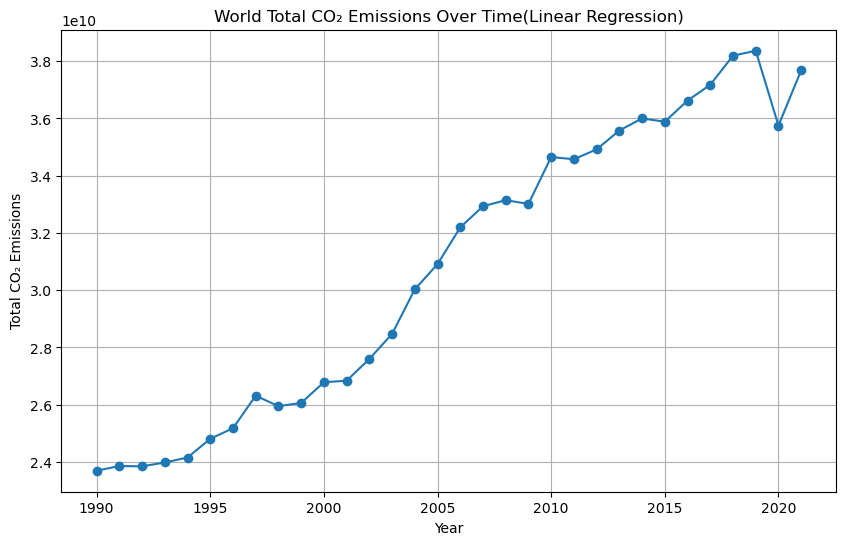

In [18]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(10,6))
plt.plot(df_world['Year'], df_world['Total_CO2'], marker='o')
plt.title('World Total CO₂ Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('Total CO₂ Emissions')
plt.grid(True)
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = df_world['Year'].values.reshape(-1, 1) # make 1 to 2 dimension 
y = df_world['Total_CO2'].values

lr_model = LinearRegression()
lr_model.fit(X, y)

LinearRegression()

In [14]:
future_years = np.arange(1990, 2031).reshape(-1, 1)

predictions = lr_model.predict(future_years)

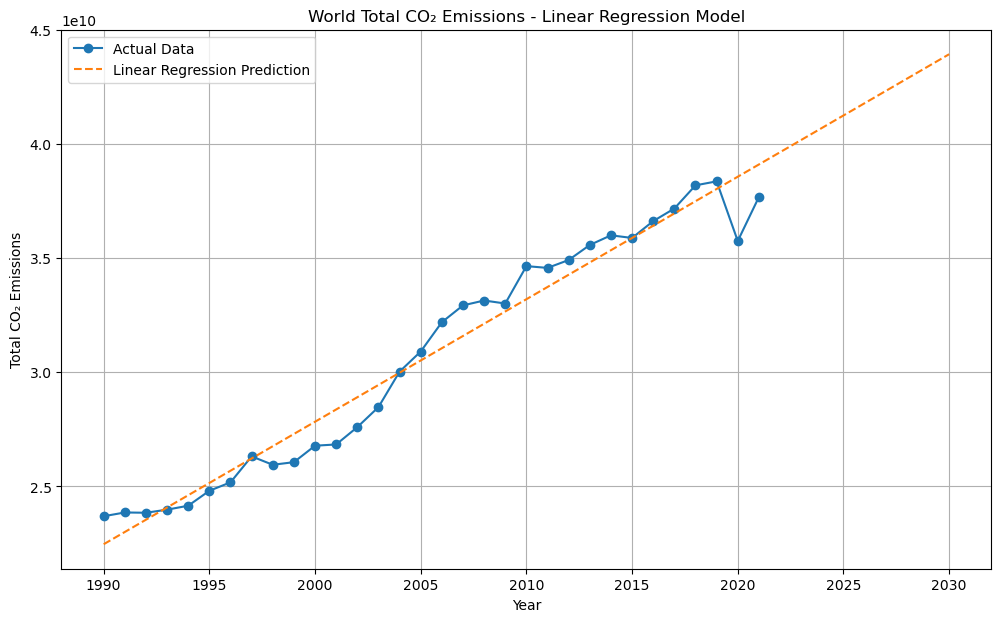

In [16]:
plt.figure(figsize=(12,7))
plt.plot(df_world['Year'], df_world['Total_CO2'], label='Actual Data', marker='o')
plt.plot(future_years.flatten(), predictions, label='Linear Regression Prediction', linestyle='--')

plt.title('World Total CO₂ Emissions - Linear Regression Model')
plt.xlabel('Year')
plt.ylabel('Total CO₂ Emissions')
plt.legend()
plt.grid(True)
plt.show()


In [26]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X, y)


RandomForestRegressor(random_state=42)

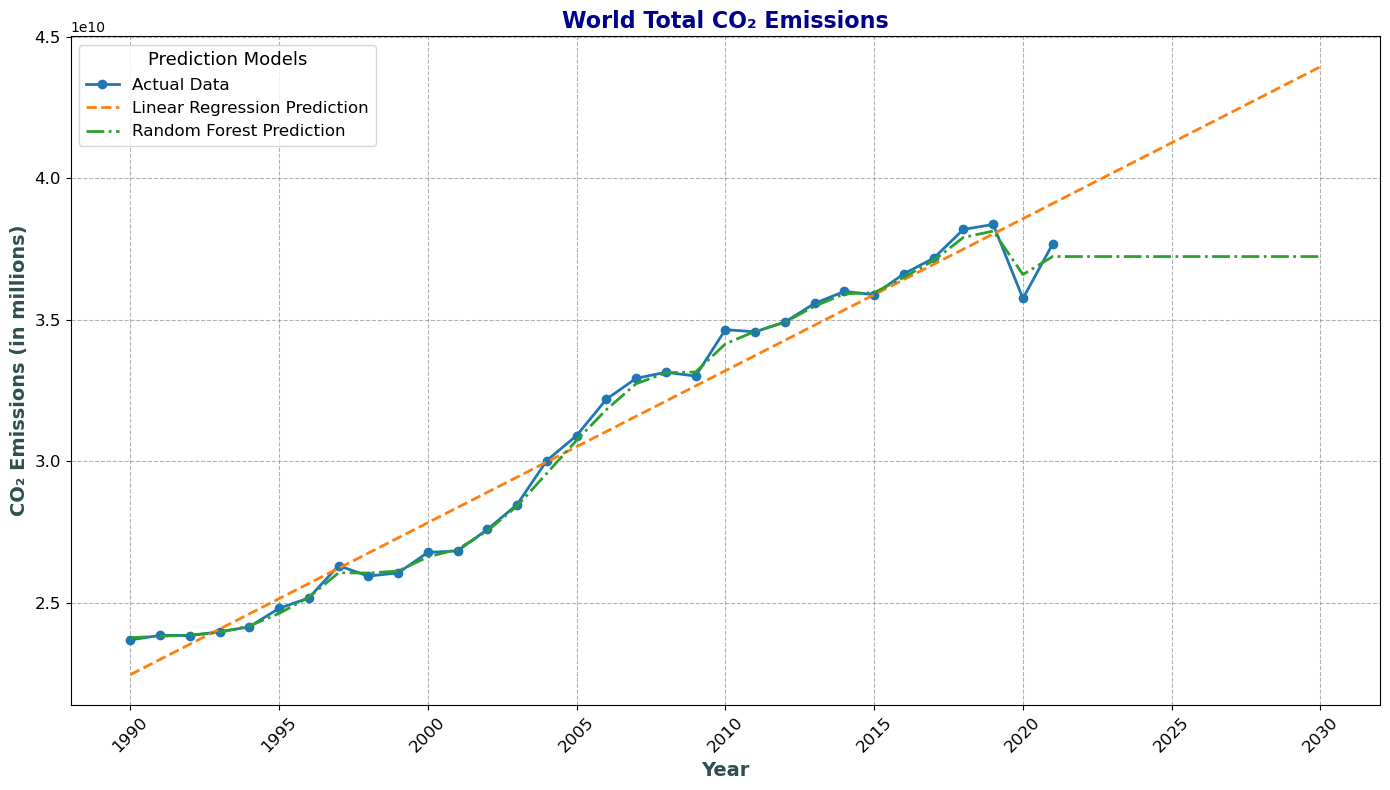

In [28]:
rf_predictions = rf_model.predict(future_years)

plt.figure(figsize=(14, 8))

plt.plot(df_world['Year'], df_world['Total_CO2'], 'o-', label='Actual Data', color='tab:blue', markersize=6, linewidth=2)

plt.plot(future_years.flatten(), predictions, '--', label='Linear Regression Prediction', color='tab:orange', linewidth=2)

plt.plot(future_years.flatten(), rf_predictions, '-.', label='Random Forest Prediction', color='tab:green', linewidth=2)

plt.title('World Total CO₂ Emissions', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Year', fontsize=14, fontweight='bold', color='darkslategray')
plt.ylabel('CO₂ Emissions (in millions)', fontsize=14, fontweight='bold', color='darkslategray')

plt.legend(fontsize=12, title='Prediction Models', title_fontsize=13)
plt.grid(True, linestyle='--', color='gray', alpha=0.6)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


In [30]:
#BAŞKA 3 MODEL DAHA EKLE VE ONU DA GRAFİĞE EKLE VE 5 FARKLI CSV DE YAP BUNLARI